# Load data

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import pygadm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# import data
data_rain = pd.read_csv("../data/data_OBS_DEU_P1M_RR.csv", header=0, index_col=False)
data_station = pd.read_csv("../data/sdo_OBS_DEU_P1M_RR.csv", header=0)

# Data Wrangling

In [3]:
data_rain

Produkt_Code  SDO_ID Zeitstempel   Wert  Qualitaet_Byte  \
0        OBS_DEU_P1M_RR       1  1936-01-01  114.8             4.0   
1        OBS_DEU_P1M_RR       1  1936-02-01   31.0             4.0   
2        OBS_DEU_P1M_RR       1  1936-03-01   26.9             4.0   
3        OBS_DEU_P1M_RR       1  1936-04-01   89.4             4.0   
4        OBS_DEU_P1M_RR       1  1936-05-01   23.9             4.0   
...                 ...     ...         ...    ...             ...   
3054845  OBS_DEU_P1M_RR     999  2005-08-01   40.3             4.0   
3054846  OBS_DEU_P1M_RR     999  2005-09-01   52.5             4.0   
3054847  OBS_DEU_P1M_RR     999  2005-10-01   50.1             4.0   
3054848  OBS_DEU_P1M_RR     999  2005-11-01   36.5             4.0   
3054849  OBS_DEU_P1M_RR     999  2005-12-01   79.2             4.0   

         Qualitaet_Niveau  
0                       5  
1                       5  
2                       5  
3                       5  
4                       5  
...                   ...  
3054845                 9  
3054846                 9  
3054847                 9  
3054848                 9  
3054849                 9  

[3054850 rows x 6 columns]

In [4]:
data_rain.dtypes

Produkt_Code         object
SDO_ID                int64
Zeitstempel          object
Wert                float64
Qualitaet_Byte      float64
Qualitaet_Niveau      int64
dtype: object

In [5]:
data_rain["Zeitstempel"] = pd.to_datetime(data_rain["Zeitstempel"])

In [6]:
data_rain_merge = data_rain.drop(["Qualitaet_Byte", "Qualitaet_Niveau"], axis=1)


In [7]:
data_rain_merge

Produkt_Code  SDO_ID Zeitstempel   Wert
0        OBS_DEU_P1M_RR       1  1936-01-01  114.8
1        OBS_DEU_P1M_RR       1  1936-02-01   31.0
2        OBS_DEU_P1M_RR       1  1936-03-01   26.9
3        OBS_DEU_P1M_RR       1  1936-04-01   89.4
4        OBS_DEU_P1M_RR       1  1936-05-01   23.9
...                 ...     ...         ...    ...
3054845  OBS_DEU_P1M_RR     999  2005-08-01   40.3
3054846  OBS_DEU_P1M_RR     999  2005-09-01   52.5
3054847  OBS_DEU_P1M_RR     999  2005-10-01   50.1
3054848  OBS_DEU_P1M_RR     999  2005-11-01   36.5
3054849  OBS_DEU_P1M_RR     999  2005-12-01   79.2

[3054850 rows x 4 columns]

In [8]:
data_station

SDO_ID                         SDO_Name Geogr_Laenge Geogr_Breite  \
0      19127                        Deiningen      10,5704      48,8653   
1      16086                 Barum-St. Dionys      10,3906      53,3367   
2      15994                   Sukow-Zietlitz      11,5485      53,5696   
3      15965  Brückenau, Bad (Elisabethenhof)       9,7838      50,3102   
4      15991            Schönenberg-Kübelberg       7,3346      49,4108   
...      ...                              ...          ...          ...   
5644   15559                          Hörstel       7,5862      52,2899   
5645   19172                           Wacken       9,3880      54,0246   
5646   19356                   Lobenstein (A)      11,6500      50,4501   
5647   15964                    Krefeld-Mitte       6,5600      51,3300   
5648   19331           Mönchengladbach-Rheydt       6,4300      51,1581   

      Hoehe_ueber_NN                                      Metadata_Link  
0              423.0  https://cdc.dwd.de/rest/metadata/station/html/...  
1                4.0  https://cdc.dwd.de/rest/metadata/station/html/...  
2               44.0  https://cdc.dwd.de/rest/metadata/station/html/...  
3              350.0  https://cdc.dwd.de/rest/metadata/station/html/...  
4              253.0  https://cdc.dwd.de/rest/metadata/station/html/...  
...              ...                                                ...  
5644            45.0  https://cdc.dwd.de/rest/metadata/station/html/...  
5645            48.0  https://cdc.dwd.de/rest/metadata/station/html/...  
5646           520.0  https://cdc.dwd.de/rest/metadata/station/html/...  
5647            45.0  https://cdc.dwd.de/rest/metadata/station/html/...  
5648            79.0  https://cdc.dwd.de/rest/metadata/station/html/...  

[5649 rows x 6 columns]

In [9]:
data_station["Geogr_Breite"] = data_station["Geogr_Breite"].str.replace(",", ".").astype(float)

In [10]:
data_station["Geogr_Laenge"] = data_station["Geogr_Laenge"].str.replace(",", ".").astype(float)

In [11]:
data_station_merge = data_station.drop(["Metadata_Link", "SDO_Name"], axis=1)

In [12]:
data_station_merge.dtypes

SDO_ID              int64
Geogr_Laenge      float64
Geogr_Breite      float64
Hoehe_ueber_NN    float64
dtype: object

## Left join

In [13]:
data_analysis = pd.merge(data_rain_merge, data_station_merge, on=["SDO_ID"], how="left")

In [16]:
data_analysis["Wert"] = data_analysis["Wert"]

In [17]:
data_analysis

Produkt_Code  SDO_ID Zeitstempel      Wert  Geogr_Laenge  \
0        OBS_DEU_P1M_RR       1  1936-01-01  3.703226        8.8493   
1        OBS_DEU_P1M_RR       1  1936-02-01  1.000000        8.8493   
2        OBS_DEU_P1M_RR       1  1936-03-01  0.867742        8.8493   
3        OBS_DEU_P1M_RR       1  1936-04-01  2.883871        8.8493   
4        OBS_DEU_P1M_RR       1  1936-05-01  0.770968        8.8493   
...                 ...     ...         ...       ...           ...   
3054845  OBS_DEU_P1M_RR     999  2005-08-01  1.300000       11.9129   
3054846  OBS_DEU_P1M_RR     999  2005-09-01  1.693548       11.9129   
3054847  OBS_DEU_P1M_RR     999  2005-10-01  1.616129       11.9129   
3054848  OBS_DEU_P1M_RR     999  2005-11-01  1.177419       11.9129   
3054849  OBS_DEU_P1M_RR     999  2005-12-01  2.554839       11.9129   

         Geogr_Breite  Hoehe_ueber_NN  
0             47.8413           478.0  
1             47.8413           478.0  
2             47.8413           478.0  
3             47.8413           478.0  
4             47.8413           478.0  
...               ...             ...  
3054845       54.1137            15.0  
3054846       54.1137            15.0  
3054847       54.1137            15.0  
3054848       54.1137            15.0  
3054849       54.1137            15.0  

[3054850 rows x 7 columns]

# Create a geopandas df 

In [18]:
# Full dataset
# takes about 2 1/2 min 
# data_analysis['geometry'] = data_analysis.apply(lambda row: Point(row['Geogr_Laenge'], row['Geogr_Breite']), axis=1)
# geo_data_analysis = gpd.GeoDataFrame(data_analysis.drop(["Geogr_Laenge", "Geogr_Breite"], axis=1), geometry="geometry")
# geo_data_oct = geo_data_analysis[geo_data_analysis["Zeitstempel"] == "2022-10-01"]

In [19]:
data_oct = data_analysis[data_analysis["Zeitstempel"] == "2022-10-01"]
data_oct

Produkt_Code  SDO_ID Zeitstempel      Wert  Geogr_Laenge  \
3224     OBS_DEU_P1M_RR    1001  2022-10-01  0.964516       13.5747   
8154     OBS_DEU_P1M_RR    1014  2022-10-01  1.061290        7.2191   
9265     OBS_DEU_P1M_RR    1016  2022-10-01  1.519355        9.6429   
11345    OBS_DEU_P1M_RR    1021  2022-10-01  1.522581       11.3714   
11950    OBS_DEU_P1M_RR    1022  2022-10-01  1.025806       13.4108   
...                 ...     ...         ...       ...           ...   
3045764  OBS_DEU_P1M_RR     983  2022-10-01  1.874194       10.5599   
3046933  OBS_DEU_P1M_RR     985  2022-10-01  2.119355       10.2892   
3048801  OBS_DEU_P1M_RR     988  2022-10-01  0.658065        8.1137   
3049820  OBS_DEU_P1M_RR     989  2022-10-01  0.600000        6.7849   
3051723  OBS_DEU_P1M_RR     991  2022-10-01  0.732258       13.7087   

         Geogr_Breite  Hoehe_ueber_NN  
3224          51.6451            97.0  
8154          53.2289             2.0  
9265          54.7949            25.0  
11345         51.2946           120.0  
11950         50.7684           535.0  
...               ...             ...  
3045764       48.5562           419.0  
3046933       49.0504           492.0  
3048801       52.6746            27.0  
3049820       51.5765            46.0  
3051723       50.9116           359.0  

[1845 rows x 7 columns]

In [20]:
data_oct['geometry'] = data_oct.apply(lambda row: Point(row['Geogr_Laenge'], row['Geogr_Breite']), axis=1)

/var/folders/x9/f1yft47d1kn17f_tvbj9qhm40000gn/T/ipykernel_7284/3084526445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_oct['geometry'] = data_oct.apply(lambda row: Point(row['Geogr_Laenge'], row['Geogr_Breite']), axis=1)


In [23]:
geo_data_oct = gpd.GeoDataFrame(data_oct.drop(["Geogr_Laenge", "Geogr_Breite"], axis=1), geometry="geometry", crs="EPSG:4326")

In [24]:
data_oct.shape

(1845, 8)

# Get administrative borders of Germany


In [25]:
de = pygadm.get_items(admin="DEU", content_level=0)

# Plot the data

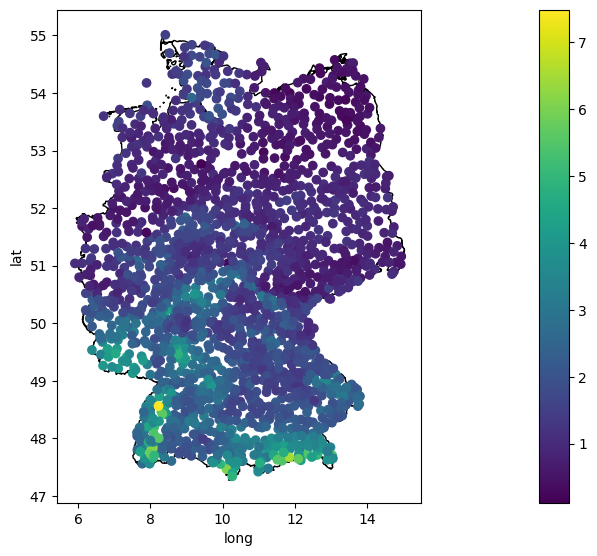

In [26]:
# Create the figure and axes
fig, ax = plt.subplots(figsize=(8, 15))
divider = make_axes_locatable(ax)

# create `cax` for the colorbar
cax = divider.append_axes("right", size="5%", pad=0.1)

# Plot the borders
de.plot(ax=ax, facecolor='white', edgecolor='black')

# Plot the rainfall at the stations and get the legend object
geo_data_oct.plot(column='Wert', ax=ax, legend=True, cax=cax)
ax.set_xlabel("long")
ax.set_ylabel("lat")

plt.show()

## First smoother function

In [27]:
import sys
sys.path.append("../rainpy/")

In [29]:
from rain import knn_smooth, plot_points, plot_interpolation

In [31]:
# function take approx 60 seconds
knn_data = knn_smooth(df=data_oct, country_df=de, variable="Wert", 
           long="Geogr_Laenge", lat="Geogr_Breite", radius=1, grid_count=150)

In [33]:
knn_data.head()

Geogr_Laenge  Geogr_Breite  Wert  neighbours                  geometry
0      5.866300       47.2708   NaN         0.0  POINT (5.86630 47.27080)
1      5.927881       47.2708   NaN         0.0  POINT (5.92788 47.27080)
2      5.989461       47.2708   NaN         0.0  POINT (5.98946 47.27080)
3      6.051042       47.2708   NaN         0.0  POINT (6.05104 47.27080)
4      6.112622       47.2708   NaN         0.0  POINT (6.11262 47.27080)

In [35]:
fig = plot_points(df=knn_data, country_df=de, variable="Wert", markersize=4)

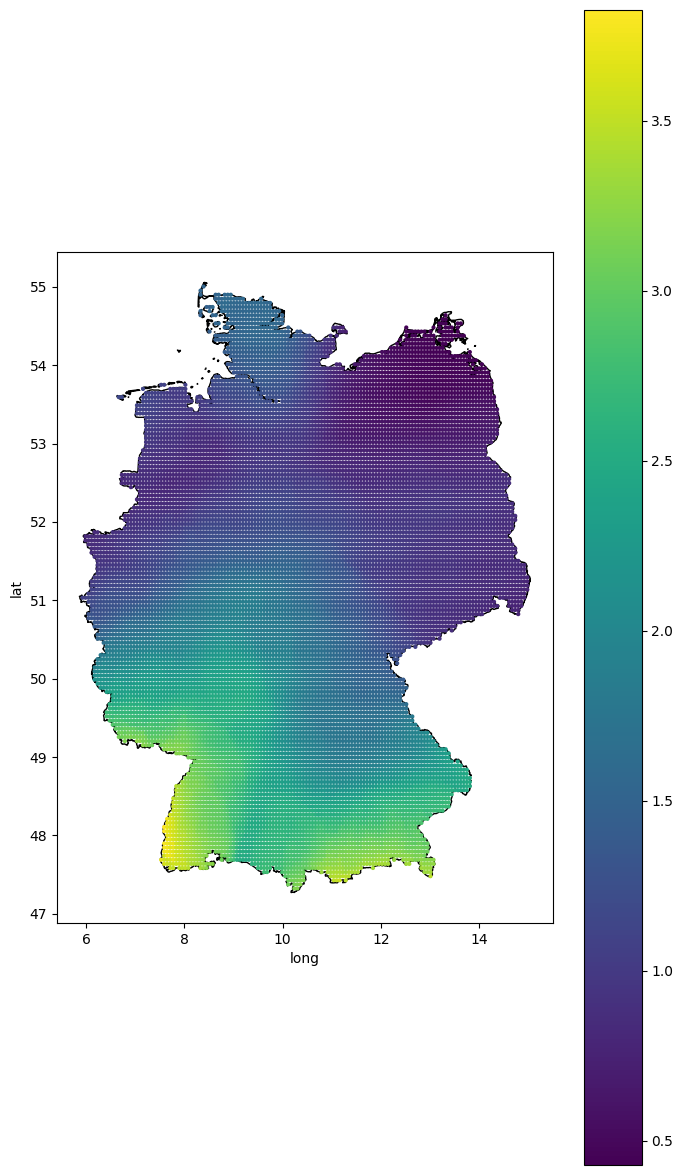

In [36]:
fig

# Analyze the neighbours 

In [39]:
temp_data = gpd.sjoin(knn_data, de, predicate="within")
temp_data = temp_data[knn_data.columns]

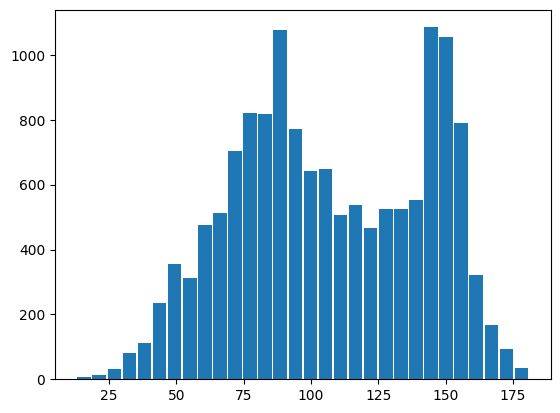

In [41]:
plt.hist(x=temp_data["neighbours"], bins=30, rwidth=0.9)
plt.show()

## Interpolation

In [43]:
sub_data = knn_data.dropna(subset=['Wert'])

In [45]:
fig = plot_interpolation(sub_data, de, variable="Wert", n=150)

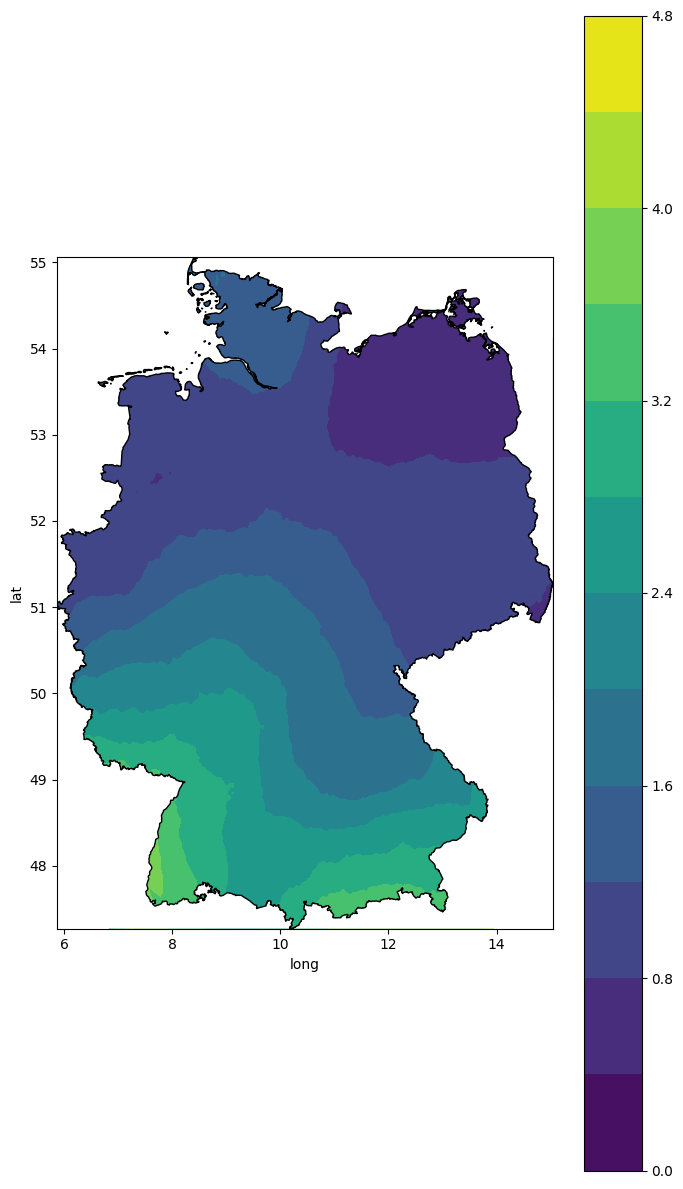

In [46]:
fig